### Introduction	
An airline company surveyed their customer satisfaction rate for better improving their service quality and benefiting their business. In order to achieve better service quality for increasing customer retention and attracting more new customers, a model needs to be built to help understand how to meet the customers expection and get a better satisfaction rate.<br> This dataset from kaggle https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction contains 129880 individual surveys with total 19 numeric variables and  5 categorical variables related to the customer and service properties. In the model, variable 'satisfaction' is selected as target variable, and other variables are predictor variables.

### Load the dataset of 'Airline Passenger Satisfaction' from Kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [ ]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

### Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [4]:
df.head(5)

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_clean = df.dropna(axis=0).drop(['Unnamed: 0'],axis=1)

### Data exploration

In [6]:
df_clean.satisfaction.value_counts()

neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction, dtype: int64

In [7]:
# Great! This is a balanced dataset based on target variable.
#change variable 'satisfaction' from object to integer
df_clean.loc[df_clean['satisfaction']=='neutral or dissatisfied','satisfaction_int']=0
df_clean.loc[df_clean['satisfaction']=='satisfied','satisfaction_int']=1

In [8]:
#remove the original 'satisfaction'.
df_clean = df_clean.drop('satisfaction',axis=1)

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

In [10]:

df_clean.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction_int
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,0.434499
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,0.495693
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [11]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
flight_distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
inflight_wifi_service,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
departure_arrival_time_convenient,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
gate_location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
food_and_drink,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
online_boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
seat_comfort,129487.0,3.441589,1.319168,0.0,2.0,4.0,5.0,5.0
inflight_entertainment,129487.0,3.358067,1.334149,0.0,2.0,4.0,4.0,5.0


#### Numeric Variables Exploration

In [12]:
num_columns_list = list(df_clean.select_dtypes(include=['int','float']))

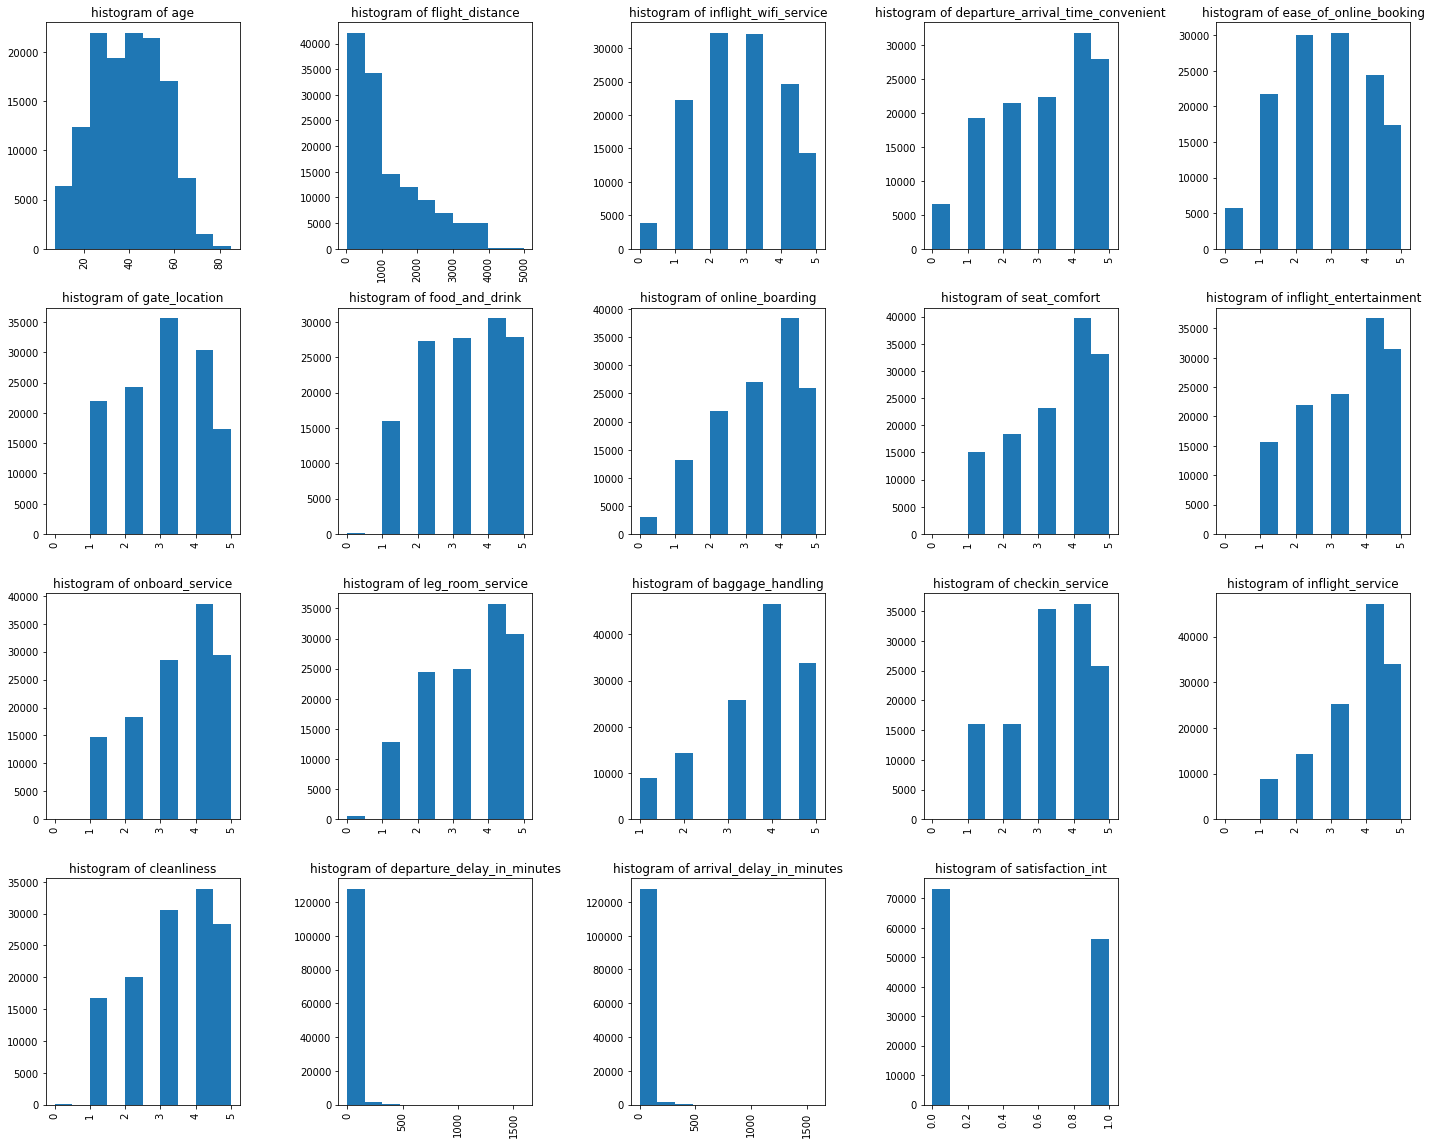

In [13]:
plt.figure(figsize=(20,16))
for i, column in enumerate(num_columns_list):
    plt.subplot(4,5,i+1)
    plt.hist(df_clean[column])
    plt.title('histogram of {}'.format(column))
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
corrmat_df_clean = df_clean[num_columns_list].corr()
print(corrmat_df_clean)

                                        age  flight_distance  \
age                                1.000000         0.099863   
flight_distance                    0.099863         1.000000   
inflight_wifi_service              0.015779         0.006554   
departure_arrival_time_convenient  0.036780        -0.018901   
ease_of_online_booking             0.022294         0.064959   
gate_location                     -0.000709         0.005378   
food_and_drink                     0.023283         0.057136   
online_boarding                    0.207485         0.215082   
seat_comfort                       0.159229         0.157825   
inflight_entertainment             0.074990         0.130518   
onboard_service                    0.056743         0.111224   
leg_room_service                   0.038992         0.134548   
baggage_handling                  -0.048192         0.064810   
checkin_service                    0.033182         0.073635   
inflight_service                  -0.051

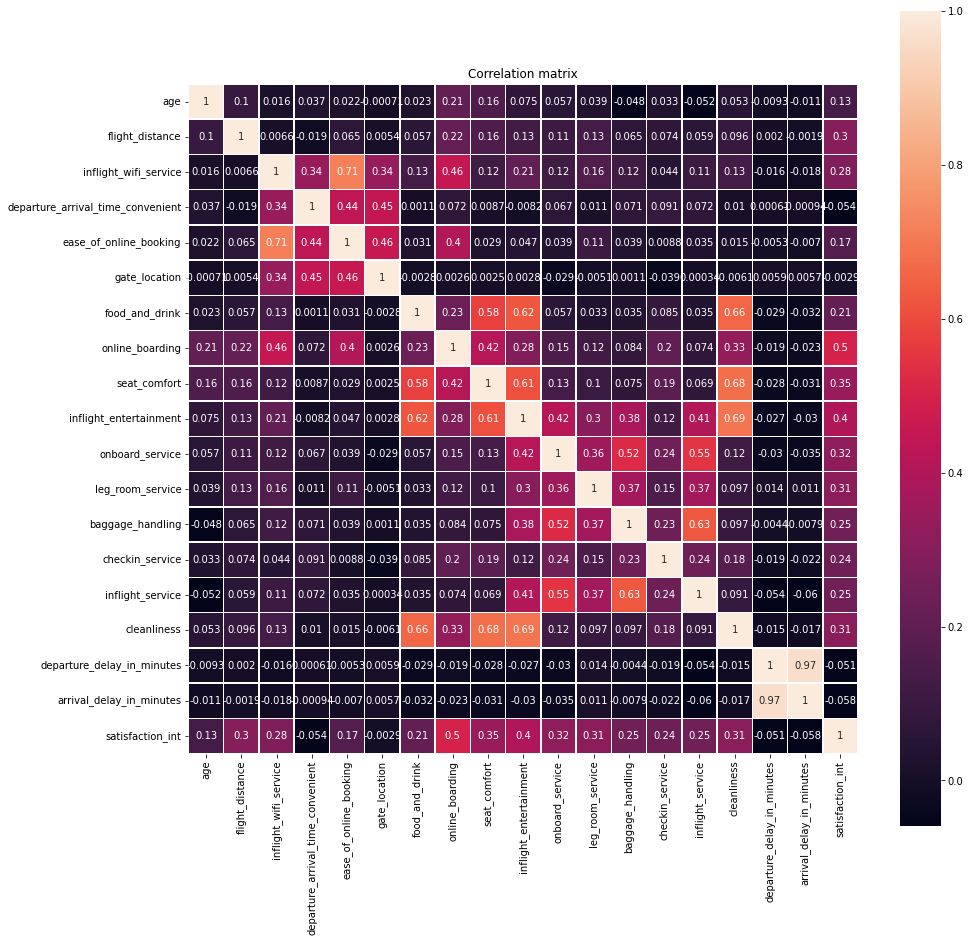

In [15]:
#plot the heatmap of correlation between numeric variables
plt.figure(figsize=(15,15))
sns.heatmap(corrmat_df_clean,square=True,annot=True,linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

In [16]:
num_columns_list 

['age',
 'flight_distance',
 'inflight_wifi_service',
 'departure_arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'onboard_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes',
 'satisfaction_int']

In [17]:
# pick the numeric columns having correlation factor with 'satisfaction_int' greater than 0.3.
pik_num_columns = ['flight_distance','online_boarding','seat_comfort','inflight_entertainment','onboard_service','leg_room_service','cleanliness']

#### Categorical Variables Exploration

In [18]:
#list all the categorical variables
cat_columns_list = list(df_clean.select_dtypes(include=['object']))

In [19]:
cat_columns_list

['Gender', 'customer_type', 'type_of_travel', 'customer_class']

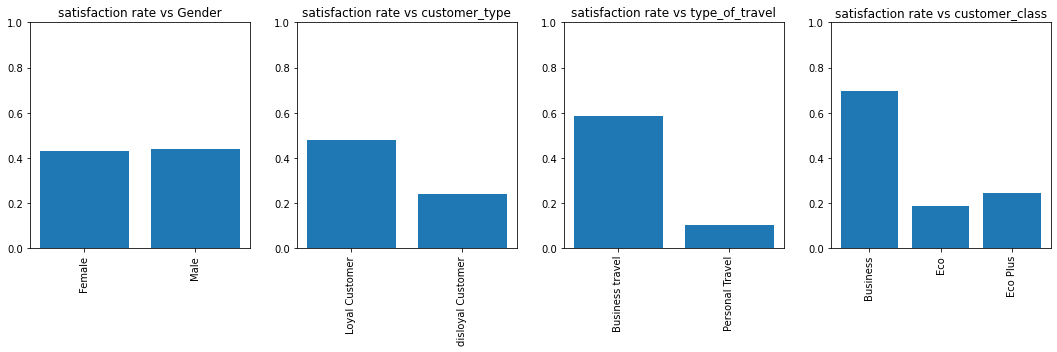

In [20]:
plt.figure(figsize=(15,5))
for i, column in enumerate(cat_columns_list):
    plt.subplot(1,4,i+1)
    plt.bar(df_clean.groupby(column)['satisfaction_int'].mean().index,df_clean.groupby(column)['satisfaction_int'].mean())
    plt.title('satisfaction rate vs {}'.format(column))
    plt.ylim([0,1])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Feature engineering

In [21]:
#pick more categorical variables in method 1
#using one-hot encoding to change norminal variables into numeric variables
dummy_column_index=[]#list
df_clean_1 = df_clean.copy()
for i in cat_columns_list:
    dummy_column = pd.get_dummies(df_clean[i],drop_first=True)
    dummy_column_index = np.append(dummy_column_index,dummy_column.columns)
    df_clean_1 = pd.concat([df_clean_1,dummy_column],axis=1)

In [22]:
dummy_column_index

array(['Male', 'disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus'],
      dtype=object)

In [23]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

In [24]:
#pick categorical get_dummies() columns with bigger effect on satisfaction_int.
pik_dummy_columns = ['disloyal Customer', 'Personal Travel', 'Eco', 'Eco Plus']

In [25]:
X = df_clean_1[pik_num_columns + pik_dummy_columns]
Y = df_clean_1['satisfaction_int']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
#for KNN method, features need scaling
X_sc = StandardScaler().fit_transform(X)
X_sc_train,X_sc_test,Y_sc_train,Y_sc_test = train_test_split(X_sc,Y,test_size=0.2,random_state=42)

### Build three classification models including Random Forest, Gradient Boosting and KNN, including some hyperparameters tuning.

### Random Forest

### Random Forest-max_depth tuning

In [ ]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
score_depth = np.zeros(7)
max_depth_list = [2, 5, 20, 50, 80, 100, None]
for i in range(7):
    clf = RandomForestClassifier(n_estimators=500, max_depth=max_depth_list[i])
    clf.fit(X_train,Y_train)
    score_depth[i] = clf.score(X_test,Y_test)

Accuracy with max_depth =  [2, 5, 20, 50, 80, 100, None]: [0.86087729 0.88682524 0.9122326  0.90327438 0.9027338  0.90339022
 0.90281103]


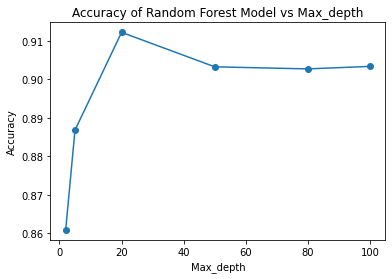

In [28]:
print('Accuracy with max_depth =  [2, 5, 20, 50, 80, 100, None]:',score_depth)
fig = plt.figure()
plt.plot(max_depth_list,score_depth,'-o')
plt.title('Accuracy of Random Forest Model vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()

### Random Forest-max_features tuning

In [29]:
score_features = np.zeros(6)
max_features_list = [2, 4, 6, 8, 11, None]
for i in range(6):
    clf = RandomForestClassifier(n_estimators=500, max_features=max_features_list[i])
    clf.fit(X_train,Y_train)
    score_features[i] = clf.score(X_test,Y_test)

Accuracy with max_features = [2, 4, 6, 8, 11, None]: [0.90176848 0.90485752 0.90644065 0.90690401 0.90640204 0.90640204]


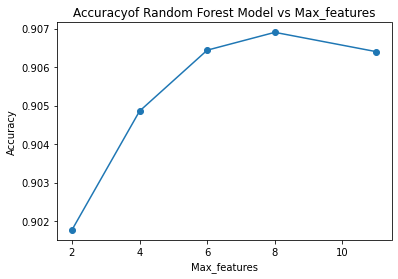

In [30]:
print('Accuracy with max_features = [2, 4, 6, 8, 11, None]:',score_features)
fig = plt.figure()
plt.plot(max_features_list,score_features,'-o')
plt.title('Accuracyof Random Forest Model vs Max_features')
plt.xlabel('Max_features')
plt.ylabel('Accuracy')
plt.show()

### Random Forest-GridSearchCV parameter

In [31]:
#https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
parameters_rf = {'max_depth': [15, 20, 25],
                 'max_features': [7, 8, 9],
                 'n_estimators': [100, 500]
                }
rf_grid = GridSearchCV(RandomForestClassifier(), parameters_rf, n_jobs=-1,cv=5)
#GridSearchCV does cross validation
#https://stackoverflow.com/questions/49160206/does-gridsearchcv-perform-cross-validation#:~:text=Yes%2C%20GridSearchCV%20performs%20cross%2Dvalidation,on%20a%20testing%20data%20set.
rf_grid.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25], 'max_features': [7, 8, 9],
                         'n_estimators': [100, 500]})

In [32]:
print(" Random Forest results from GridSearchCV: " )
print("\n The best estimator across ALL searched params:\n",rf_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",rf_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",rf_grid.best_params_)

 Random Forest results from GridSearchCV: 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=15, max_features=8, n_estimators=500)

 The best score across ALL searched params:
 0.9192675035539197

 The best parameters across ALL searched params:
 {'max_depth': 15, 'max_features': 8, 'n_estimators': 500}


In [33]:
#using the best parameter from GridSearchCV to fit the test data
rfc_grid_best =  RandomForestClassifier(max_depth= 15, max_features=7, n_estimators=500)
rfc_grid_best.fit(X_train,Y_train)
score_rfc_grid_best = rfc_grid_best.score(X_test,Y_test)
print('Accuracy of Random Forest classifier using parameter from GridSearchCV is:',score_rfc_grid_best)

Accuracy of Random Forest classifier using parameter from GridSearchCV is: 0.9185651401652637


In [34]:
#check the best run across all tested parameters of Random Forest
start_RF = time.time()
rfc_best =  RandomForestClassifier(max_depth= 15, max_features=7, n_estimators=500)
rfc_best.fit(X_train,Y_train)
score_rfc_best = rfc_best.score(X_test,Y_test)
print('Accuracy of Random Forest classifier using best parameters is:',score_rfc_best)
print(f'Randomn Forest classifier time elapsed: {round(time.time() - start_RF, 2)} seconds.')

Accuracy of Random Forest classifier using best parameters is: 0.9182948490230906
Randomn Forest classifier time elapsed: 79.72 seconds.


In [35]:
#best run of random forest
predictions_rfc = rfc_best.predict(X_test)
accuracy = accuracy_score(Y_test, predictions_rfc)
precision = precision_score(Y_test, predictions_rfc)
recall = recall_score(Y_test, predictions_rfc)
f1 = f1_score(Y_test, predictions_rfc)
print('For Random Forest classifier using the 5 most important features:\n')
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

For Random Forest classifier using the 5 most important features:

Accuracy score: 0.92
Precision score: 0.92
Recall score: 0.89
F1 score: 0.90


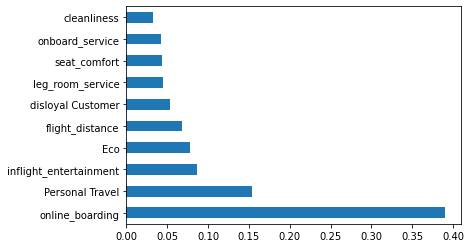

In [36]:
feat_importances = pd.Series(rfc_best.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [37]:
#pick 5 most important factors for the random forest model 
feat_importances.nlargest(5).index

Index(['online_boarding', 'Personal Travel', 'inflight_entertainment', 'Eco',
       'flight_distance'],
      dtype='object')

In [38]:
X_RF = df_clean_1[feat_importances.nlargest(5).index]
X_RF_train,X_RF_test,Y_RF_train,Y_RF_test = train_test_split(X_RF,Y,test_size=0.2,random_state=42)

In [39]:
start_RF_5 = time.time()
rfc_best_5 =  RandomForestClassifier(max_depth= 15, n_estimators=500)
rfc_best_5.fit(X_RF_train,Y_RF_train)
score_rfc_5 = rfc_best_5.score(X_RF_test,Y_RF_test)
print('Accuracy of Random Forest classifier using the 5 most important features is:',score_rfc_5)
print(f'Randomn Forest classifier with the 5 most important feature time elapsed: {round(time.time() - start_RF_5, 2)} seconds.')

Accuracy of Random Forest classifier using the 5 most important features is: 0.8689087960460267
Randomn Forest classifier with the 5 most important feature time elapsed: 48.47 seconds.


In [40]:
#run with 5 important features
predictions_rfc_5 = rfc_best_5.predict(X_RF_test)
accuracy = accuracy_score(Y_RF_test, predictions_rfc_5)
precision = precision_score(Y_RF_test, predictions_rfc_5)
recall = recall_score(Y_RF_test, predictions_rfc_5)
f1 = f1_score(Y_RF_test, predictions_rfc_5)
print('For Random Forest classifier using the 5 most important features:\n')
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

For Random Forest classifier using the 5 most important features:

Accuracy score: 0.87
Precision score: 0.87
Recall score: 0.82
F1 score: 0.84


### Random Forest Model can achieve best accuracy at 92% using 79.72s, if choosing to use the 5 most important factors for prediction, can get the accuracy of 87% using 48.47s.

### Gradient Boosting Model

### Gradient Boosting Model-max_depth tuning

In [41]:
score_depth = np.zeros(7)
max_depth_list = [2, 3, 5, 7, 20, 50, None]
for i in range(7):
    clf = GradientBoostingClassifier(n_estimators=500, max_depth=max_depth_list[i])
    clf.fit(X_train,Y_train)
    score_depth[i] = clf.score(X_test,Y_test)

Accuracy with max_depth =  [2, 3, 5, 7, 20, 50, None]: [0.90497336 0.91234844 0.91694339 0.91651865 0.90296548 0.88979844
 0.88941231]


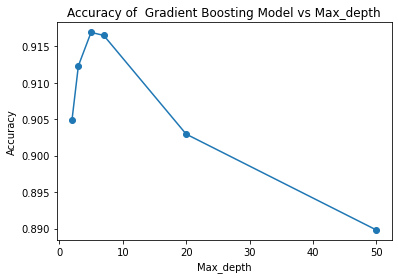

In [42]:
print('Accuracy with max_depth =  [2, 3, 5, 7, 20, 50, None]:',score_depth)
fig = plt.figure()
plt.plot(max_depth_list,score_depth,'-o')
plt.title('Accuracy of  Gradient Boosting Model vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()

### Gradient Boosting Model-learning_rate tuning

In [43]:
score_learning = np.zeros(6)
learning_rate_list = [0.001,0.005,0.01,0.1,0.5,1]
for i in range(6):
    clf = GradientBoostingClassifier(n_estimators=500, learning_rate=learning_rate_list[i])
    clf.fit(X_train,Y_train)
    score_learning[i] = clf.score(X_test,Y_test)

Accuracy with learning_rate = [0.001,0.005,0.01,0.1,0.5,1]: [0.84512318 0.89300332 0.89752104 0.91234844 0.91508997 0.91138312]


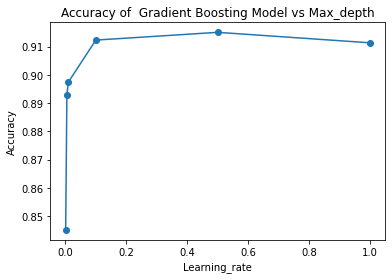

In [44]:
print('Accuracy with learning_rate = [0.001,0.005,0.01,0.1,0.5,1]:',score_learning)
fig = plt.figure()
plt.plot(learning_rate_list,score_learning,'-o')
plt.title('Accuracy of  Gradient Boosting Model vs Max_depth')
plt.xlabel('Learning_rate')
plt.ylabel('Accuracy')
plt.show()

### Gradient Boosting Model- using selected parameters

In [45]:
gb_grid_best =  GradientBoostingClassifier(max_depth= 5, n_estimators=500, learning_rate=0.5)
gb_grid_best.fit(X_train,Y_train)
score_gb_grid_best = gb_grid_best.score(X_test,Y_test)
print('Accuracy of Gradient Boosting Classifier using best parameters is:',score_gb_grid_best)

Accuracy of Gradient Boosting Classifier using best parameters is: 0.9110742142250366


In [46]:
#check the best run of Gradient Boosting
start_GB = time.time()
gb_best =  GradientBoostingClassifier(max_depth= 5, n_estimators=500)
gb_best.fit(X_train,Y_train)
score_gb_best = gb_best.score(X_test,Y_test)
print('Accuracy of Gradient Boosting model using selected parameters is:',score_gb_best)
print(f'Gradient Boosting Model time elapsed: {round(time.time() - start_GB, 2)} seconds.')

Accuracy of Gradient Boosting model using selected parameters is: 0.9169820063325353
Gradient Boosting Model time elapsed: 76.32 seconds.


In [47]:
#best run of gradient boosting
predictions_gb = gb_best.predict(X_test)
accuracy = accuracy_score(Y_test, predictions_gb)
precision = precision_score(Y_test, predictions_gb)
recall = recall_score(Y_test, predictions_gb)
f1 = f1_score(Y_test, predictions_gb)
print('For gradient boosting:\n')
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

For gradient boosting:

Accuracy score: 0.92
Precision score: 0.92
Recall score: 0.89
F1 score: 0.90


### Gradient Boosting Model can achieve best accurracy at 92% using 76.32s.

### KNN

In [48]:
#using untreated features
# for knn,target variable not necessary to be numeric
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, Y_train)
score_knn = knn.score(X_test,Y_test)
print('Accuracy of KNN (unnormalized features) is:',score_knn)

Accuracy of KNN (unnormalized features) is: 0.8433469766005097


In [49]:
#using standarscaler treating features
knn.fit(X_sc_train, Y_sc_train)
score_knn_sc = knn.score(X_sc_test, Y_sc_test)
print('Accuracy of KNN (scaled features) is:',score_knn_sc)

Accuracy of KNN (scaled features) is: 0.895435940999305


### KNN-n_neighbors tuning-stardardscaler

In [50]:
score_n_neighbors = np.zeros(8)
n_neighbors_list = [2, 3, 5, 7, 15, 30, 50, 100]
for i in range(8):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors_list[i],weights='distance') 
    clf.fit(X_sc_train,Y_sc_train)
    score_n_neighbors[i] = clf.score(X_sc_test,Y_sc_test)

Accuracy with n_neighbors_list = [2, 3, 5, 7, 15, 30, 50, 100]: [0.88485597 0.89215383 0.89543594 0.8958993  0.89864082 0.89922002
 0.89941308 0.89821608]


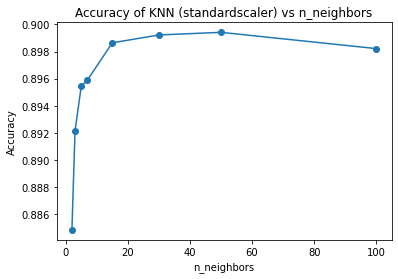

In [51]:
print('Accuracy with n_neighbors_list = [2, 3, 5, 7, 15, 30, 50, 100]:',score_n_neighbors)
fig = plt.figure()
plt.plot(n_neighbors_list,score_n_neighbors,'-o')
plt.title('Accuracy of KNN (standardscaler) vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [52]:
#check the best run of KNN
start_KNN = time.time()
knn_best = KNeighborsClassifier(n_neighbors=50,weights='distance')
knn_best.fit(X_sc_train,Y_sc_train)
score_knn_best = knn_best.score(X_sc_test,Y_sc_test)
print('Accuracy of KNN classifier using best parameter is:',score_knn_best)
print(f'KNN classification time elapsed: {round(time.time() - start_KNN, 2)} seconds.')

Accuracy of KNN classifier using best parameter is: 0.8994130820912812
KNN classification time elapsed: 10.71 seconds.


In [53]:
#best run of KNN
predictions_knn = knn_best.predict(X_sc_test)
accuracy = accuracy_score(Y_sc_test, predictions_knn)
precision = precision_score(Y_sc_test, predictions_knn)
recall = recall_score(Y_sc_test, predictions_knn)
f1 = f1_score(Y_sc_test, predictions_knn)
print('For KNN:\n')
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

For KNN:

Accuracy score: 0.90
Precision score: 0.91
Recall score: 0.85
F1 score: 0.88


### KNN Model can achieve best accuracy at 90% using 10.71s.

### Summary: Random Forest and Gradient Boosting model can achieve similar accuracy around 91.80% and 91.69%, while KNN achieve lower accuracy as 89.94%. KNN classification method needs feature scaling. Comparing the time used for running the model, KNN uses shortest running time 12.38s, Random Forest and Gradient Boosting model use simlilar running time, 74.05s and 72.5s. For Random Forest model, if I use the 5 most important factors in the model, the accuracy changes to 86.93% and running time drops to 45.84s.Therefore, for predicting this airline passengers satisfaction dataset, I choose to use Random Forest model if I want to achieve better accuray, use KNN if I want to use less running time.